# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
[item.shape for item in (X_train, y_train, X_test, y_test)]    

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]

# Preview

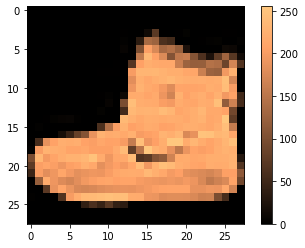

In [4]:
plt.imshow(X_train[0], cmap='copper')
plt.colorbar()

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocessing

In [6]:
X_train, X_test = X_train.reshape(*X_train.shape, 1), X_test.reshape(*X_test.shape, 1)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
X_train, X_test = X_train/255, X_test/255

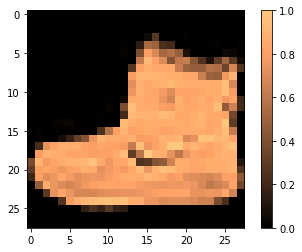

In [9]:
plt.imshow(X_train[0].reshape((28,28)), cmap='copper')
plt.colorbar()

In [10]:
y_train, y_test = (tf.keras.utils.to_categorical(y) for y in (y_train, y_test))

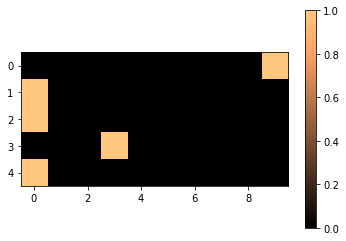

In [11]:
plt.imshow(y_train[:5], cmap='copper')
plt.colorbar()

# Model

In [12]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [13]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(), 
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),    
])

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=1000,
                    validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor='val_accuracy', patience=20)
                    ])

Epoch 1/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.6909 - accuracy: 0.7451 - val_loss: 0.4331 - val_accuracy: 0.8462
Epoch 2/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.4191 - accuracy: 0.8466 - val_loss: 0.3501 - val_accuracy: 0.8740
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.3532 - accuracy: 0.8704 - val_loss: 0.3194 - val_accuracy: 0.8845
Epoch 4/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3200 - accuracy: 0.8833 - val_loss: 0.2859 - val_accuracy: 0.8942
Epoch 5/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2953 - accuracy: 0.8921 - val_loss: 0.2760 - val_accuracy: 0.8986
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2754 - accuracy: 0.8989 - val_loss: 0.2692 - val_accuracy: 0.8989
Epoch 7/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.2609 - accuracy: 0.9053 - val_loss: 0.2587 - val_accuracy:

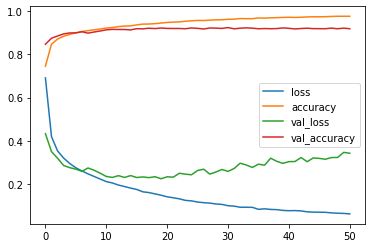

In [17]:
pd.DataFrame(history.history).plot()

# Evaluation

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(f'Test loss: {test_loss:.6f}, Test acc: {test_accuracy:.2%}')

79/79 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.9100
Test loss: 0.384077, Test acc: 91.00%


In [19]:
y_test_pred = model.predict(X_test)

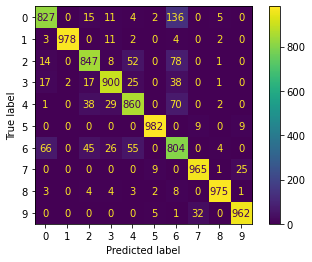

In [20]:
cmat = confusion_matrix(
    y_true=y_test.argmax(axis=1), 
    y_pred=y_test_pred.argmax(axis=1))
ConfusionMatrixDisplay(cmat).plot()

# Application

In [23]:
def application(idx=None):
    if not idx:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    plt.imshow(X_test[idx].reshape((28,28)), cmap='copper')
    plt.show()
    names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
             'Sandal','Shirt','Sneaker','Bag','Ankle boot']
    forecasted = model.predict(X_test[idx:idx+1]).argmax()
    actual = y_test[idx].argmax()
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted} ({names[forecasted]})')
    print(f'\nActual data should be {actual} ({names[actual]})')

Collected new features as follows:


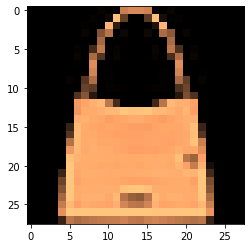


CORRECT

Model forecasted as 8 (Bag)

Actual data should be 8 (Bag)


In [24]:
application()